In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling as pf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("online_shoppers_intention.txt")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,0.000000,2,211.25,144,4627.489571,0.001361,0.020664,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,NaN
1,7,150.357143,1,9.00,221,11431.001240,0.011149,0.021904,1.582473,0.0,Nov,2,5,1,2,Returning_Visitor,True,NaN
2,3,16.000000,3,86.00,15,2773.500000,0.000000,0.030000,78.811725,0.0,Dec,2,2,1,2,Returning_Visitor,False,NaN
3,0,0.000000,0,0.00,7,705.833333,0.028571,0.085714,0.000000,0.0,Dec,5,11,4,1,Returning_Visitor,True,NaN
4,0,0.000000,0,0.00,7,212.500000,0.000000,0.033333,0.000000,0.0,Nov,3,2,1,11,Returning_Visitor,True,NaN


In [3]:
# Data Preprocessing before applying model
# Setting True = 1 and False = 0 for boolean columns
df['Revenue'] = df['Revenue'].apply(lambda x: 1 if x == True else 0)
df['Weekend'] = df['Weekend'].apply(lambda x: 1 if x == True else 0)

In [4]:
# Resetting Visitor Type:
# New_Visitor = 0, Returning_Visitor = 1, Other = 2
df['VisitorType'] = df['VisitorType'].apply(lambda x: 0 if x == 'New_Visitor' else x)
df['VisitorType'] = df['VisitorType'].apply(lambda x: 1 if x == 'Returning_Visitor' else x)
df['VisitorType'] = df['VisitorType'].apply(lambda x: 2 if x == 'Other' else x)

In [5]:
# Converting Month name to ordinal data
df['Month'] = df['Month'].apply(lambda x: 2 if x == 'Feb' else x)
df['Month'] = df['Month'].apply(lambda x: 3 if x == 'Mar' else x)
df['Month'] = df['Month'].apply(lambda x: 5 if x == 'May' else x)
df['Month'] = df['Month'].apply(lambda x: 6 if x == 'June' else x)
df['Month'] = df['Month'].apply(lambda x: 7 if x == 'Jul' else x)
df['Month'] = df['Month'].apply(lambda x: 8 if x == 'Aug' else x)
df['Month'] = df['Month'].apply(lambda x: 9 if x == 'Sep' else x)
df['Month'] = df['Month'].apply(lambda x: 10 if x == 'Oct' else x)
df['Month'] = df['Month'].apply(lambda x: 11 if x == 'Nov' else x)
df['Month'] = df['Month'].apply(lambda x: 12 if x == 'Dec' else x)

In [6]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.2,random_state = 123)

In [7]:
print(train.shape, test.shape)

(9887, 18) (2472, 18)


In [8]:
train_x = train.drop('Revenue',axis=1)
train_y = train['Revenue']

test_x = test.drop('Revenue',axis=1)
test_y = test['Revenue']

In [9]:
# Building Decision Tree Classifier Model¶
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x,train_y)

In [10]:
pred = clf.predict(test_x)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
pred.shape
sum_pred = pred.sum()
sum_pred

406

In [12]:
clf.predict_proba(test_x)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [16]:
# Tackling Over-fitting
# 1. Minimum sample size
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

In [17]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

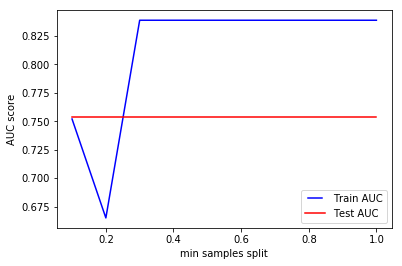

In [18]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(train_x, train_y)
   train_pred = dt.predict(train_x)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(train_y, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(test_x)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results,color="blue", label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results,color="red", label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()